In [4]:
import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler # Árvores de Decisão geralmente não precisam, mas pode ser útil para comparar
import matplotlib.pyplot as plt

In [5]:
# Carregando so dados
X_treino = np.load(os.path.join('X_treino_final.npy'), allow_pickle=True)
y_treino = np.load(os.path.join('y_treino_final.npy'))
X_teste = np.load(os.path.join('X_teste_final.npy'), allow_pickle=True)
y_teste = np.load(os.path.join('y_teste_final.npy'))

In [12]:
print("Tamanho Xtreino ", X_treino.shape)
print("Tamanho Ytreino ", y_treino.shape)
print("Tamanho Xteste ", X_teste.shape)
print("Tamanho Yteste ", y_teste.shape)

Tamanho Xtreino  (69600, 59)
Tamanho Ytreino  (69600,)
Tamanho Xteste  (17400, 59)
Tamanho Yteste  (17400,)


In [6]:
# Fazendo uma otimização de hiperrametros
min_leafs = [3, 5, 10, 15, 20, 30] #i
min_splits = [2, 4, 8, 16, 32, 40] #j
max_dephts = [None, 2, 3, 4, 5] #k
acuracia = 0
for i in min_leafs:
    for j in min_splits:
        for k in max_dephts:
            ad = DecisionTreeClassifier(min_samples_leaf=i, min_samples_split= j,max_depth=k)
            ad.fit(X_treino, y_treino)
            pred = ad.predict(X_teste)
            if acuracia < accuracy_score(y_teste, pred):
                acuracia = accuracy_score(y_teste, pred)
                leaf = i
                split = j
                depth = k
                predFinal = pred
                melhor_ad = ad
print("Melhor combinação de parametros")
print(f"DecisionTreeClassifier(min_samples_leaf={leaf}, min_samples_split={split},max_depth={depth})")
print("A acurácia no conjunto de testes: %.2f" % acuracia)
print(classification_report(y_teste, predFinal))

Melhor combinação de parametros
DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=2,max_depth=None)
A acurácia no conjunto de testes: 0.77
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       600
           1       0.69      0.76      0.72       600
           2       0.86      0.84      0.85       600
           3       0.77      0.79      0.78       600
           4       0.73      0.71      0.72       600
           5       0.80      0.78      0.79       600
           6       0.87      0.89      0.88       600
           7       0.87      0.86      0.87       600
           8       0.77      0.77      0.77       600
           9       0.85      0.88      0.87       600
          10       0.86      0.85      0.85       600
          11       0.82      0.84      0.83       600
          12       0.75      0.78      0.76       600
          13       0.74      0.75      0.75       600
          14       0.77      0.75      

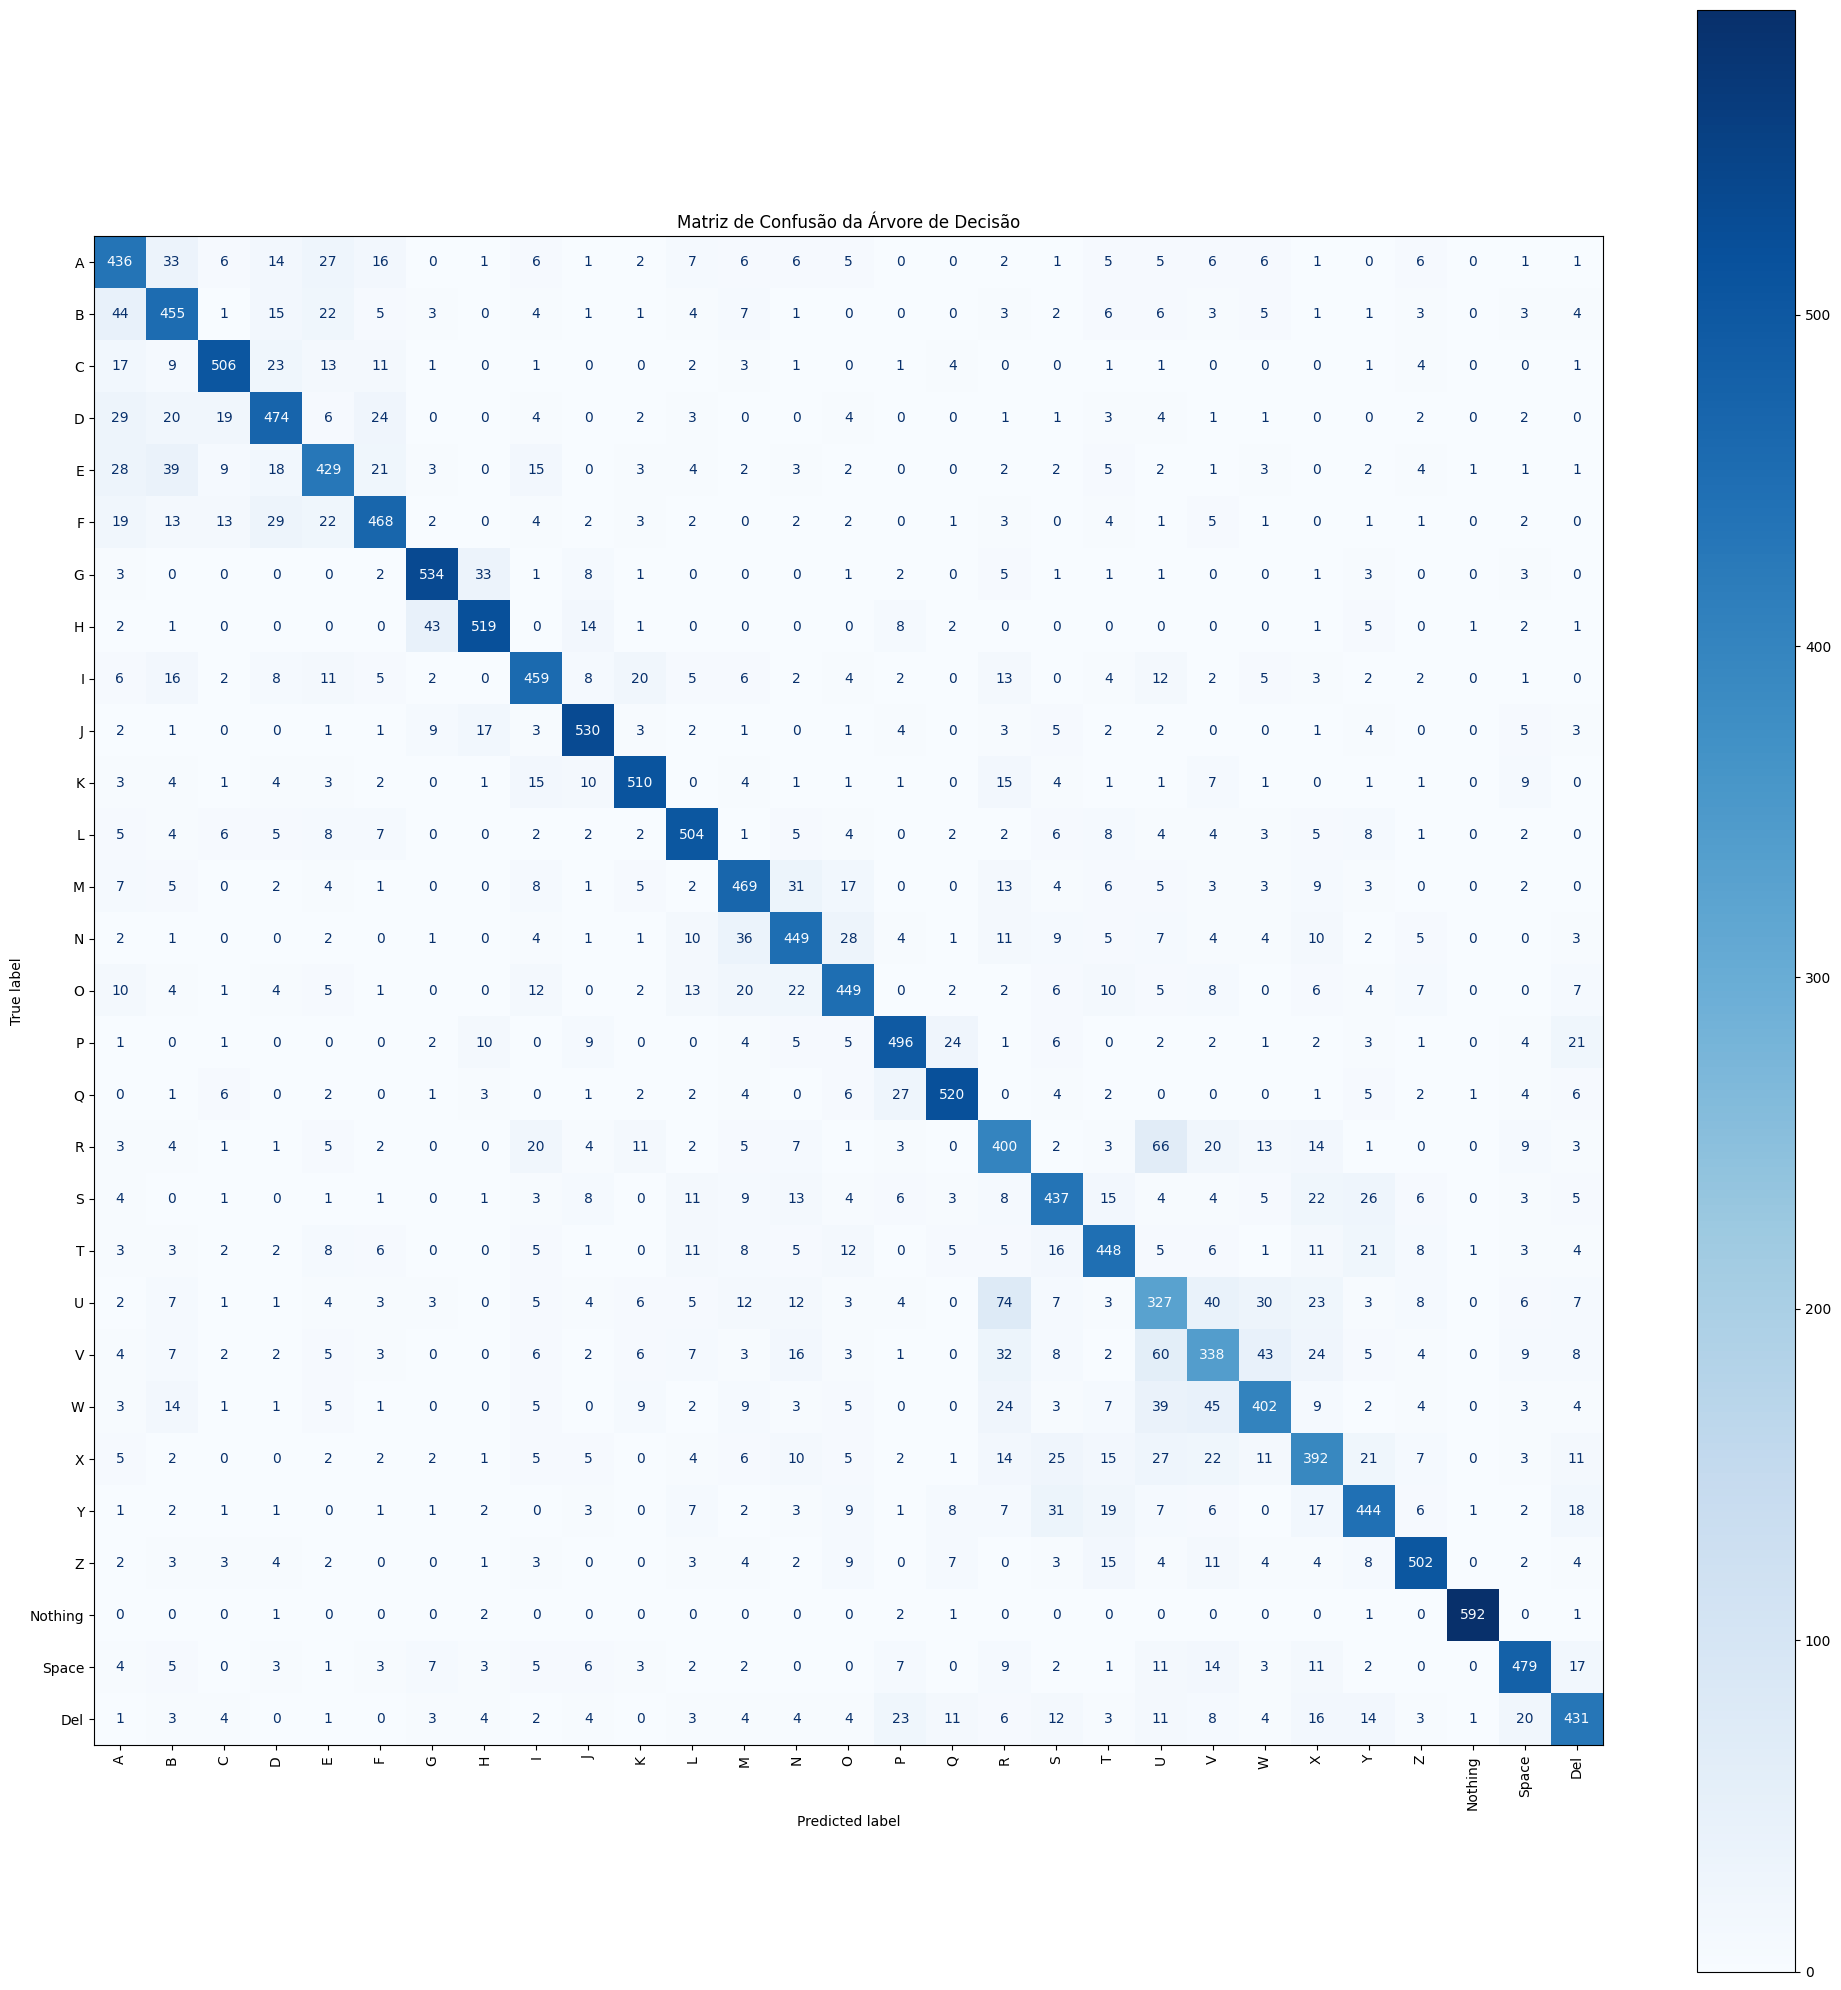

In [17]:
num_to_label = {}
current_label_id = 0

# Mapear letras (A-Z) para labels numéricas e vice-versa
for char_code in range(ord('A'), ord('Z') + 1):
    char = chr(char_code)
    num_to_label[current_label_id] = char.upper() # Usar upper() para exibição
    current_label_id += 1

# Mapear as classes especiais para labels numéricas e vice-versa
special_classes = ['nothing', 'space', 'del']
for special_class in special_classes:
    num_to_label[current_label_id] = special_class.capitalize() # Capitalizar para exibição (Nothing, Space, Del)
    current_label_id += 1

class_labels_sorted = [num_to_label[i] for i in sorted(num_to_label.keys())]

fig, ax = plt.subplots(figsize=(20, 20)) # Ajuste o tamanho conforme necessário

disp_dt = ConfusionMatrixDisplay.from_estimator(
    melhor_ad,
    X_teste,
    y_teste,
    cmap=plt.cm.Blues,
    display_labels=class_labels_sorted,
    xticks_rotation='vertical',         # Rotaciona os rótulos do eixo X para melhor legibilidade
    ax=ax                               # Passa o eixo para que possamos controlar o tamanho da figura
)
disp_dt.ax_.set_title("Matriz de Confusão da Árvore de Decisão")
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig(fname="Matrix-ArvoreDecisao.png")
plt.show()

In [15]:
#Sem otimização
# Crie a instância do classificador de Árvore de Decisão
ad = DecisionTreeClassifier()
# Fazer treino
ad.fit(X_treino, y_treino)
# Teste
pred = ad.predict(X_teste)
#Calculo de acuracia
ac = accuracy_score(y_teste, pred)
print("Acuracia sem otimização de parametros: ", ac)

Acuracia sem otimização de parametros:  0.775632183908046


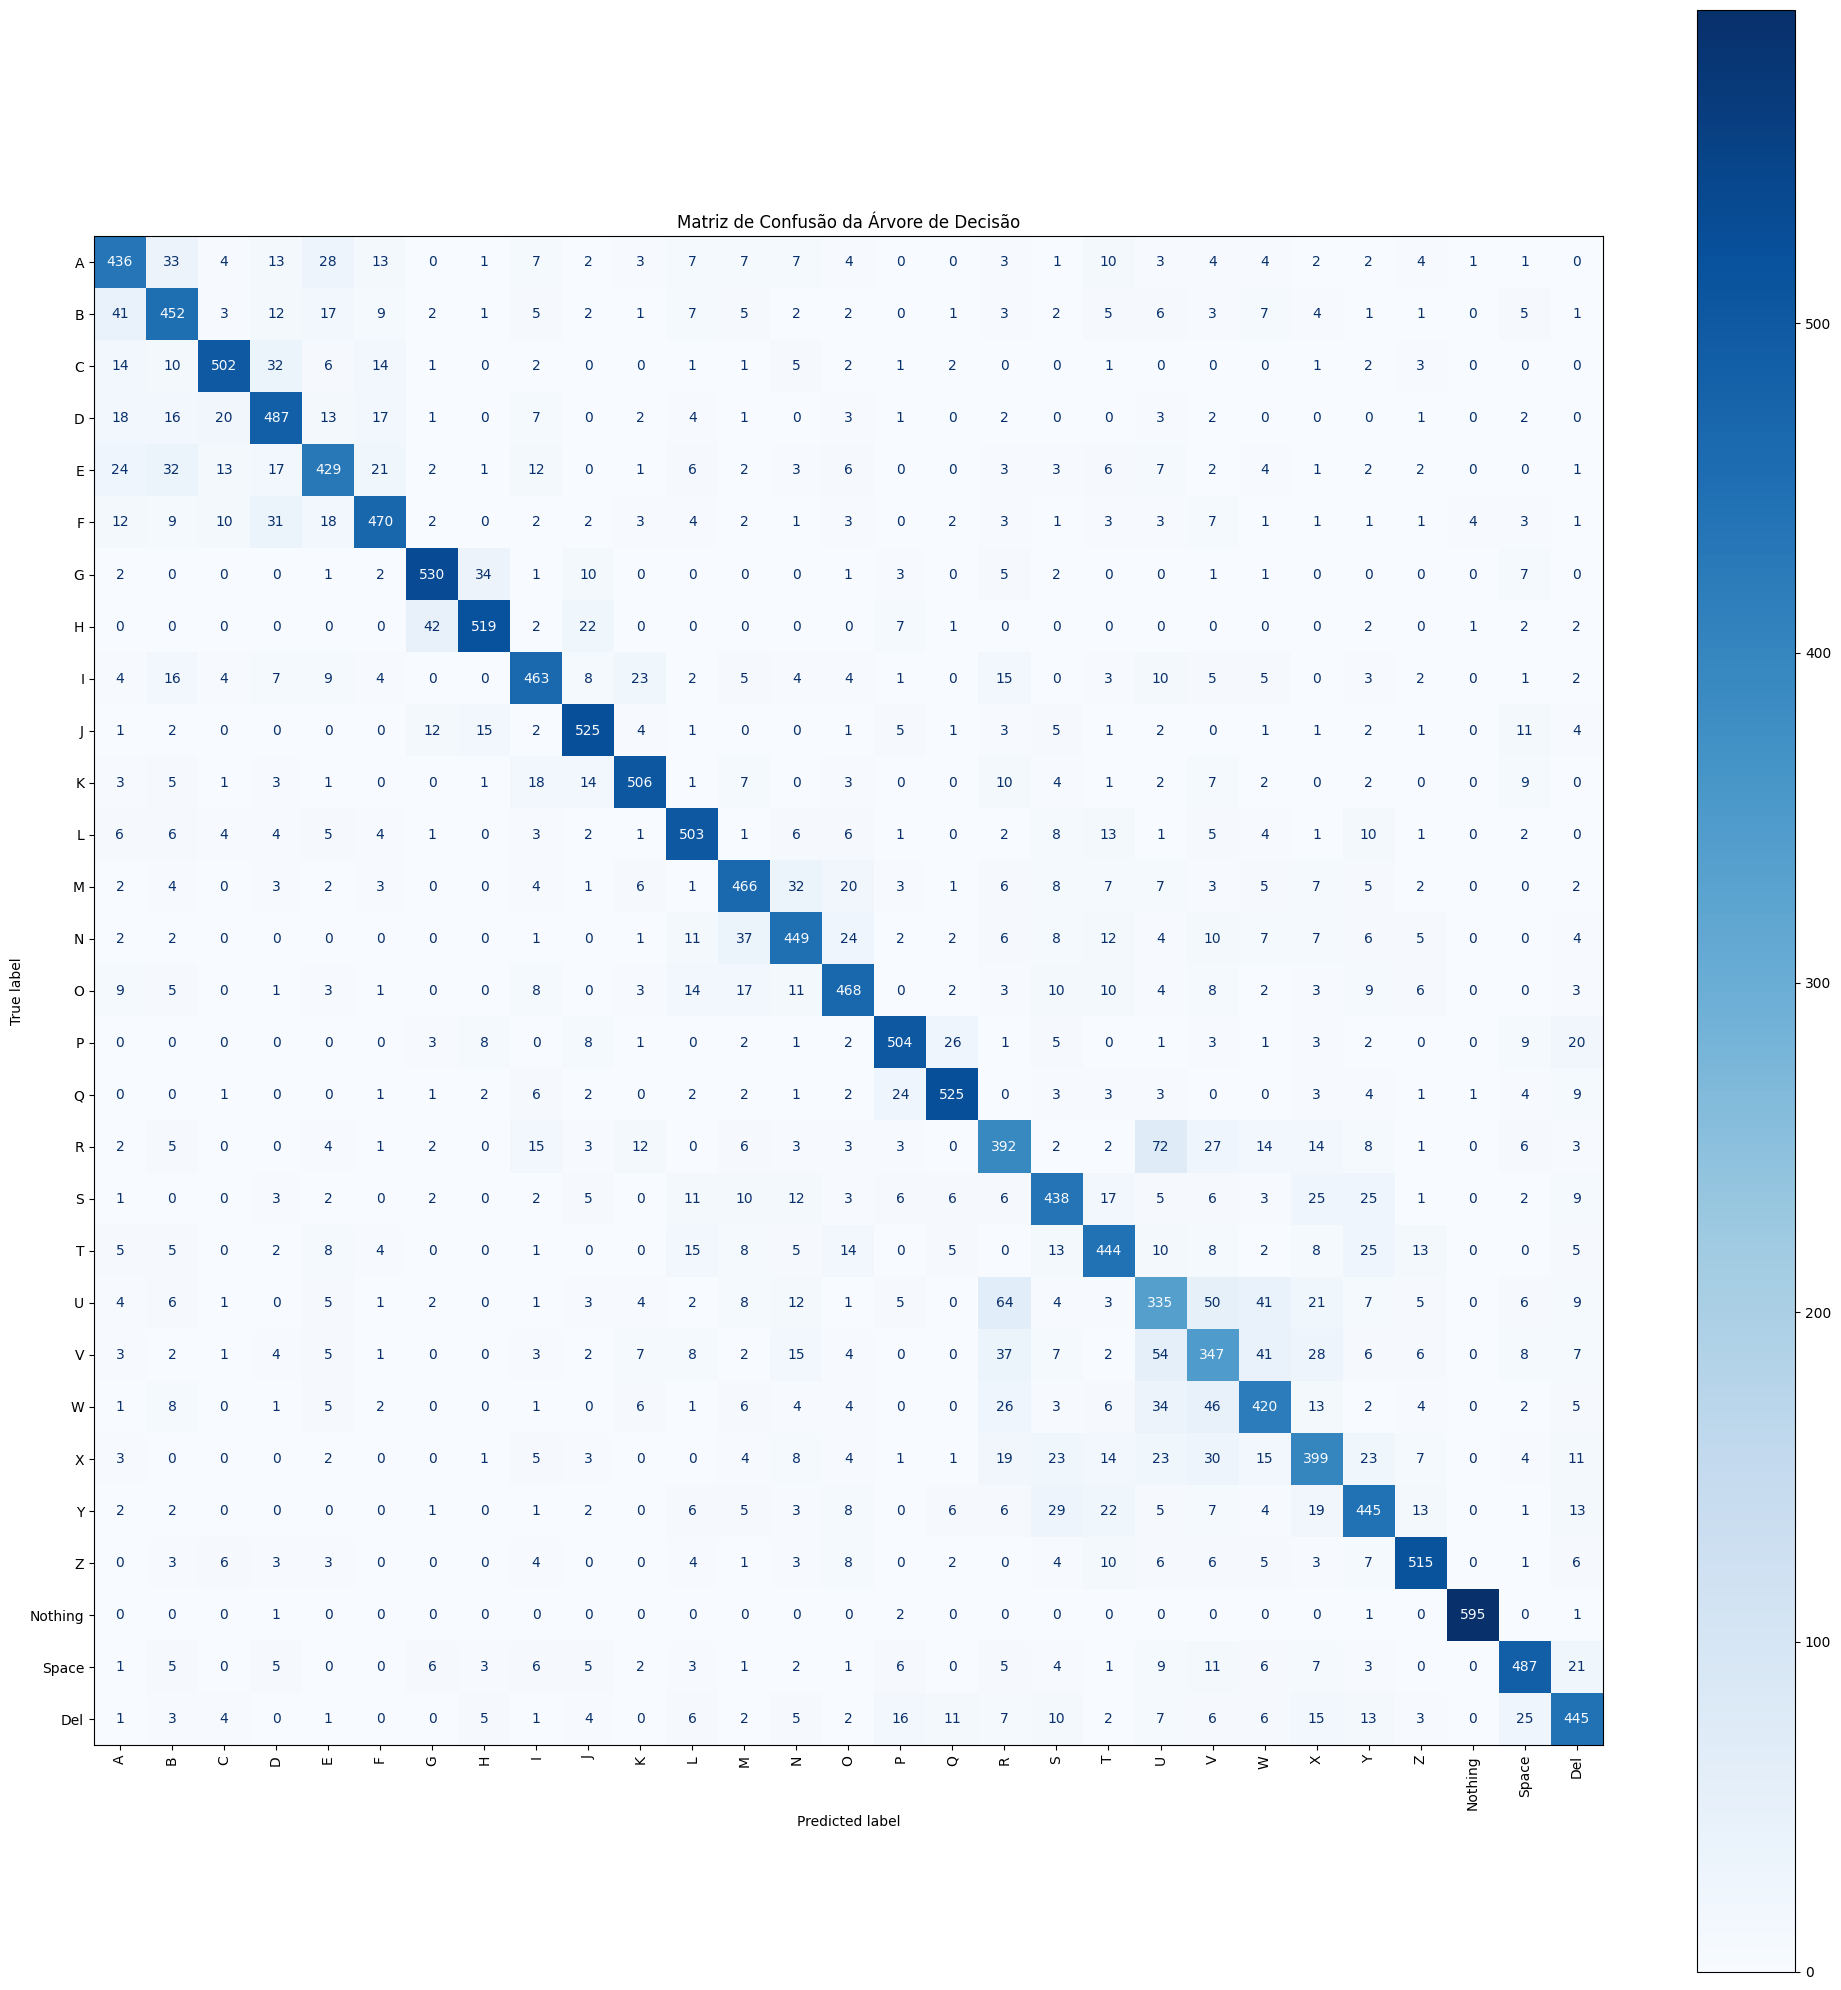

In [16]:
num_to_label = {}
current_label_id = 0

# Mapear letras (A-Z) para labels numéricas e vice-versa
for char_code in range(ord('A'), ord('Z') + 1):
    char = chr(char_code)
    num_to_label[current_label_id] = char.upper() # Usar upper() para exibição
    current_label_id += 1

# Mapear as classes especiais para labels numéricas e vice-versa
special_classes = ['nothing', 'space', 'del']
for special_class in special_classes:
    num_to_label[current_label_id] = special_class.capitalize() # Capitalizar para exibição (Nothing, Space, Del)
    current_label_id += 1

class_labels_sorted = [num_to_label[i] for i in sorted(num_to_label.keys())]

# Mostrar a matriz de confusão.
# A matriz de confusão é um dispositivo para avaliar quais os erros que o modelo cometeu.
# A diagonal principal mostra o número de acertos por classe. Todos os elementos fora da diagonal principal representam erros.
# ConfusionMatrixDisplay.from_predictions(y_teste, pred, colorbar=False, cmap="Blues")
# plt.xlabel("Rótulo Previsto")
# plt.ylabel("Rótulo Verdadeiro")
# plt.show()
fig, ax = plt.subplots(figsize=(20, 20)) # Ajuste o tamanho conforme necessário

disp_dt = ConfusionMatrixDisplay.from_estimator(
    ad,
    X_teste,
    y_teste,
    cmap=plt.cm.Blues,
    display_labels=class_labels_sorted,
    xticks_rotation='vertical',         # Rotaciona os rótulos do eixo X para melhor legibilidade
    ax=ax                               # Passa o eixo para que possamos controlar o tamanho da figura
)
disp_dt.ax_.set_title("Matriz de Confusão da Árvore de Decisão")
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig(fname="Matrix-ArvoreDecisaosemOtimizacao.png")
plt.show()